In [1]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
from silx.image.projection import Projection

from ppfft.tools.grids import domain
from ppfft.tools.new_fft import new_fft
from ppfft.tools.pad import pad
from ppfft.tools.phantom_generator import generate_phantom

In [2]:
def old_polar_fourier_transform(im, thetas, n_r):
    n = len(im)
    rs = domain(n_r) / n_r
    u, v = domain(n), domain(n)

    cos = -2j * np.pi * np.einsum("u,l,k->ulk", u, np.cos(thetas), rs)
    sin = -2j * np.pi * np.einsum("v,l,k->vlk", v, np.sin(thetas), rs)

    res = np.einsum("uv,ulk,vlk->lk", im, np.exp(cos), np.exp(sin))

    return res


def polar_fourier_transform(im, thetas, n_r):
    n = len(im)
    rs = domain(n_r) / n_r
    u, v = np.arange(n), np.arange(n)

    cos = -2j * np.pi * np.einsum("u,l,k->ulk", u, np.cos(thetas), rs)
    sin = -2j * np.pi * np.einsum("v,l,k->vlk", v, np.sin(thetas), rs)

    res = np.einsum("uv,ulk,vlk->lk", im, np.exp(cos), np.exp(sin))

    return res

In [3]:
n = 200
im = generate_phantom(n)

thetas = np.linspace(-np.pi/2, np.pi/2, endpoint=False, num=n)
proj = Projection(im.shape, angles=thetas)
sinogram = proj.projection(im)

In [4]:
n_r = n
old_pad_sino = pad(sinogram, (n, n_r)) # zero-padding the sinogram to increase the radial samples
old_fft_sinogram = new_fft(old_pad_sino)
old_polar_ft = old_polar_fourier_transform(im, np.pi / 2 + thetas, n_r)

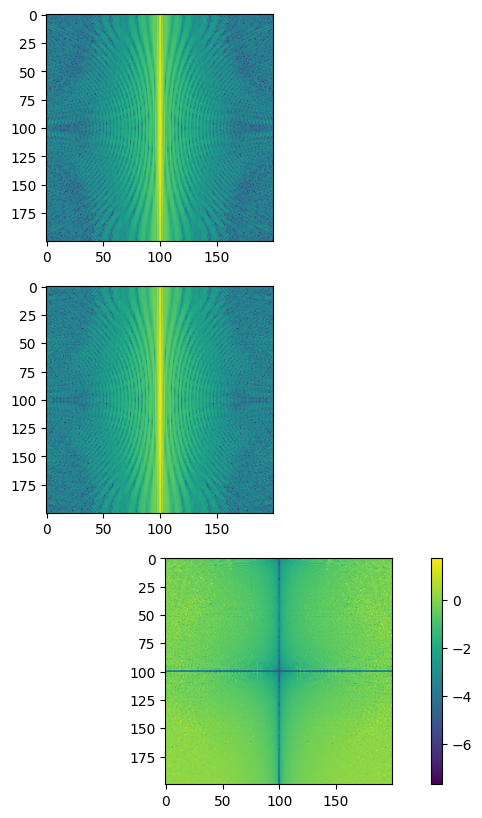

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].imshow(np.log10(np.abs(old_polar_ft)))
axes[1].imshow(np.log10(np.abs(old_fft_sinogram)))
c = axes[2].imshow(np.log10(np.abs(old_polar_ft - old_fft_sinogram)) - np.log10(np.abs(old_polar_ft)))
plt.colorbar(c, ax=axes[2])

In [6]:
new_pad_sino = np.pad(sinogram, ((0, 0), (0, n_r - n))) # zero-padding the sinogram to increase the radial samples
new_fft_sinogram = fft.fftshift(fft.fft(new_pad_sino), axes=-1)
new_polar_ft = polar_fourier_transform(im, np.pi / 2 + thetas, n_r)

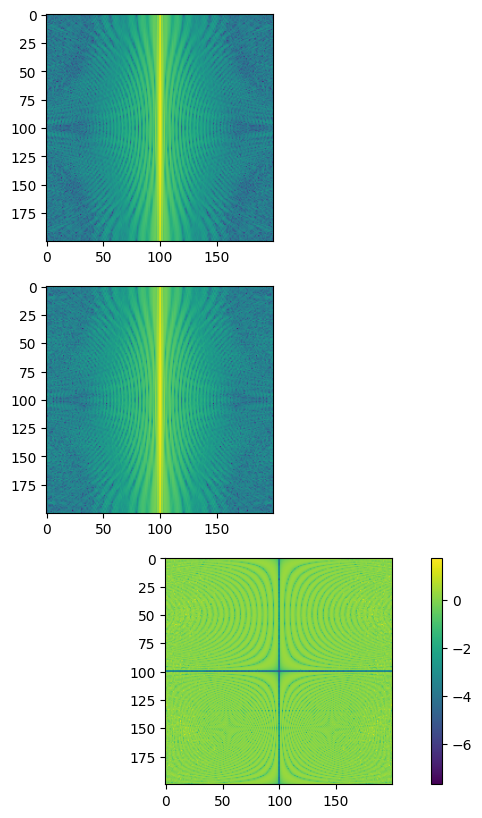

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].imshow(np.log10(np.abs(new_polar_ft)))
axes[1].imshow(np.log10(np.abs(new_fft_sinogram)))
c = axes[2].imshow((np.log10(np.abs(new_polar_ft - new_fft_sinogram))) - np.log10(np.abs(new_polar_ft)))
plt.colorbar(c, ax=axes[2])

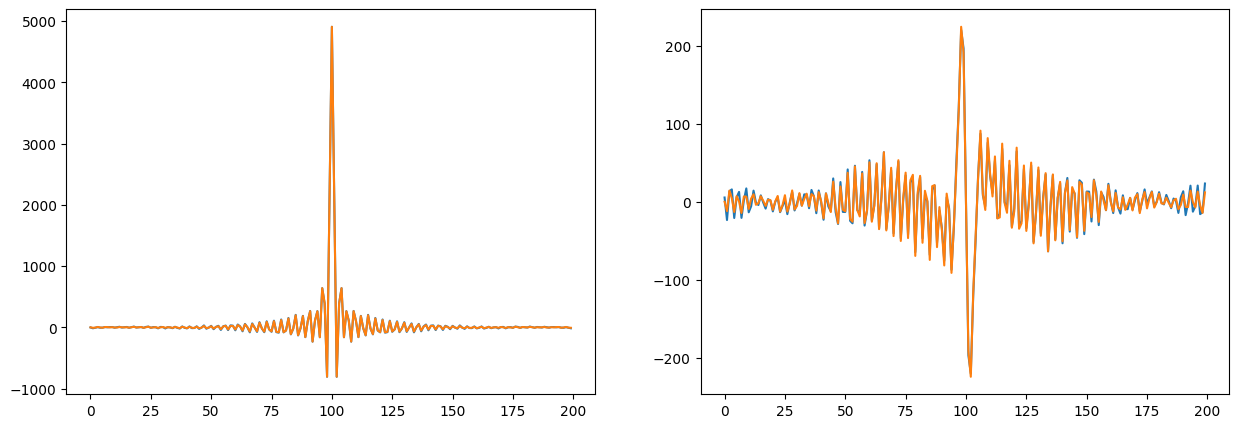

In [201]:
k = 10

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(old_polar_ft[100 + k].real)
axes[0].plot(old_fft_sinogram[100 + k].real)
axes[1].plot(old_polar_ft[100 + k].imag)
axes[1].plot(old_fft_sinogram[100 + k].imag)

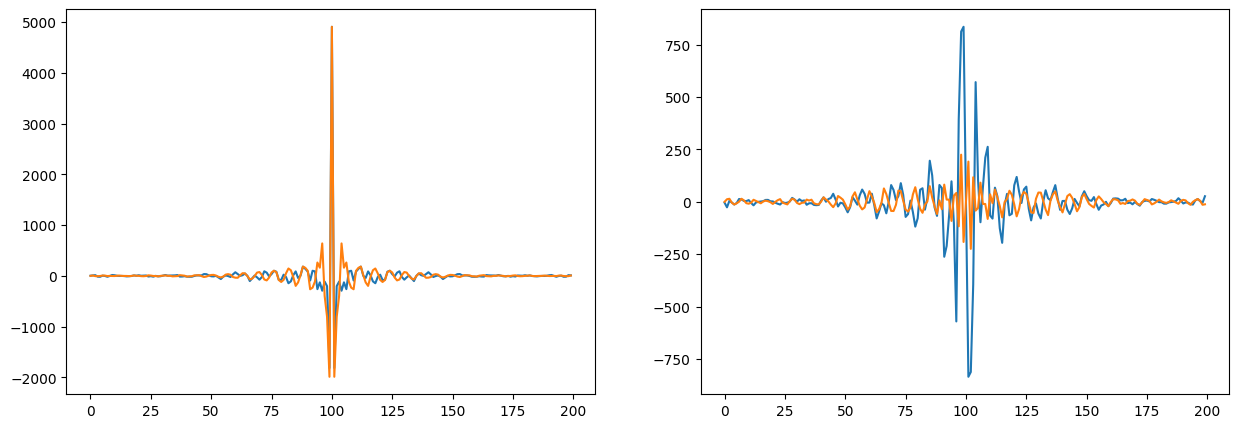

In [202]:
k = 10

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(new_polar_ft[100 + k].real)
axes[0].plot(new_fft_sinogram[100 + k].real)
axes[1].plot(new_polar_ft[100 + k].imag)
axes[1].plot(new_fft_sinogram[100 + k].imag)

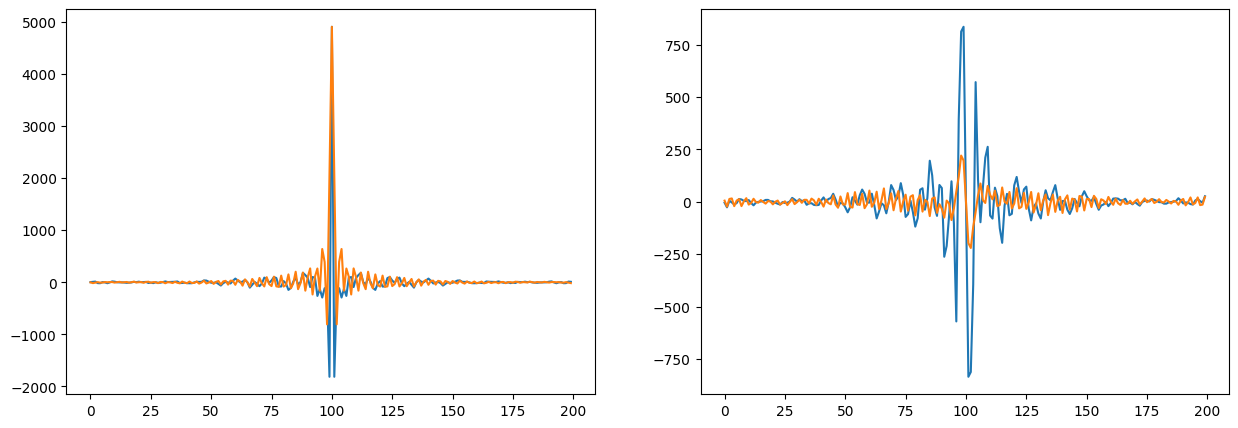

In [203]:
k = 10

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(new_polar_ft[100 + k].real)
axes[0].plot(old_polar_ft[100 + k].real)
axes[1].plot(new_polar_ft[100 + k].imag)
axes[1].plot(old_polar_ft[100 + k].imag)

In [204]:
k = 10
plt.plot(old_polar_ft[:, 200 + k].real)
plt.plot(old_fft_sinogram[:, 200 + k].real)

IndexError: index 210 is out of bounds for axis 1 with size 200

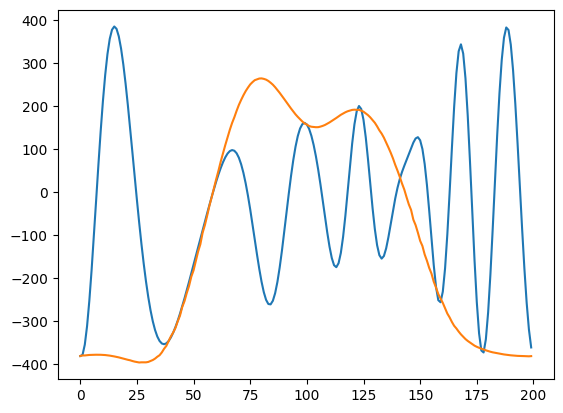

In [ ]:
k = 10
plt.plot(new_polar_ft[:, 200 + k].real)
plt.plot(new_fft_sinogram[:, 200 + k].real)

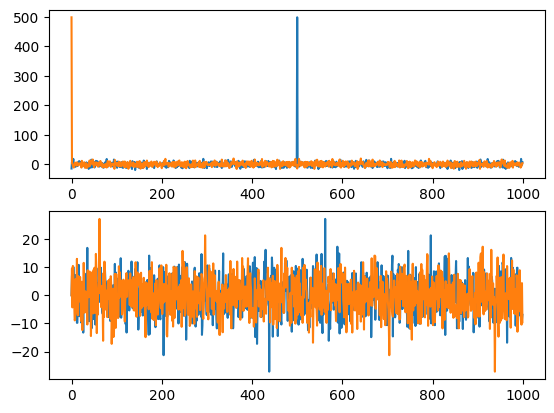

In [ ]:
x = np.random.rand(1000)

fig, axes = plt.subplots(2, 1)

axes[0].plot(np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x))).real)
axes[0].plot(np.fft.fft(x).real)

axes[1].plot(np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x))).imag)
axes[1].plot(np.fft.fft(x).imag)

In [211]:
n = 200
im = generate_phantom(n)
thetas = np.linspace(-np.pi/2, np.pi/2, endpoint=False, num=n)
n_r = n + 1

old_polar = old_polar_fourier_transform(im, thetas, n_r)
new_polar = polar_fourier_transform(np.fft.fftshift(im), thetas, n_r)

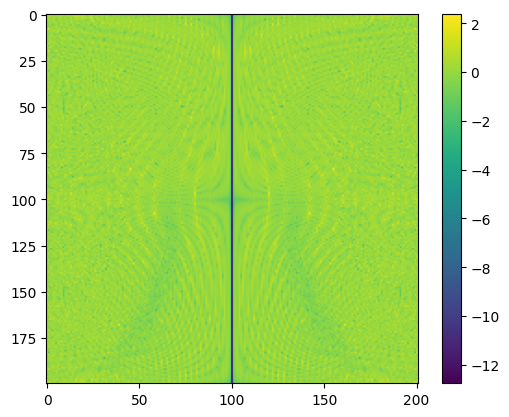

In [212]:
plt.imshow(np.log10(np.abs(new_polar - old_polar)) - np.log10(np.abs(old_polar)))
plt.colorbar()

In [209]:
n = 200
im = generate_phantom(n)
thetas = np.linspace(-np.pi/2, np.pi/2, endpoint=False, num=n)
n_r = n + 1

old_polar = old_polar_fourier_transform(fft.fftshift(im), thetas, n_r)
new_polar = polar_fourier_transform(im, thetas, n_r)

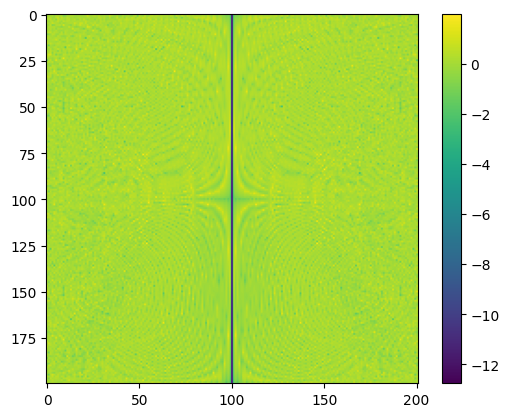

In [210]:
plt.imshow(np.log10(np.abs(new_polar - old_polar)) - np.log10(np.abs(old_polar)))
plt.colorbar()